In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# 1. LOAD DATA
print("LANGKAH 1: MEMUAT DATA")
data = pd.read_csv('../dataset/data_balita.csv')
print(f"Data berhasil dimuat dengan jumlah {data.shape[0]} baris dan {data.shape[1]} kolom.")




LANGKAH 1: MEMUAT DATA
Data berhasil dimuat dengan jumlah 120999 baris dan 4 kolom.


In [100]:
# 2. EKSPLORASI DATA AWAL
print("\nLANGKAH 2: EKSPLORASI DATA AWAL")
print("\nPreview data:")
print(data.head())

print("\nInformasi dataset:")
print(data.info())

print("\nNilai unik pada kolom Jenis Kelamin:")
print(data["Jenis Kelamin"].value_counts())

print("\nNilai unik pada kolom Status Gizi:")
print(data["Status Gizi"].value_counts())



LANGKAH 2: EKSPLORASI DATA AWAL

Preview data:
   Umur (bulan) Jenis Kelamin  Tinggi Badan       Status Gizi
0             0     laki-laki     44.591973           stunted
1             0     laki-laki     56.705203            tinggi
2             0     laki-laki     46.863358            normal
3             0     laki-laki     47.508026            normal
4             0     laki-laki     42.743494  severely stunted

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Umur (bulan)   120999 non-null  int64  
 1   Jenis Kelamin  120999 non-null  object 
 2   Tinggi Badan   120999 non-null  float64
 3   Status Gizi    120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB
None

Nilai unik pada kolom Jenis Kelamin:
Jenis Kelamin
perempuan    61002
laki-laki    59997
Name: count, dtype: int

In [101]:

# 3 PENANGANAN DATA DUPLIKAT
print("\nLANGKAH 3: PENANGANAN DATA DUPLIKAT")
duplicate_count = data.duplicated().sum()
print(f"Jumlah data duplikat: {duplicate_count}")

if duplicate_count > 0:
    print("\nContoh data duplikat (5 record pertama):")
    print(data[data.duplicated(keep=False)].sort_values(by=data.columns.tolist()).head(5))
    
    data_before = len(data)
    data = data.drop_duplicates(keep='first')
    print(f"\n{duplicate_count} data duplikat telah dihapus (keep first).")
    print(f"Jumlah data sebelum: {data_before}")
    print(f"Jumlah data setelah: {len(data)}")
else:
    print("Tidak ditemukan data duplikat, melanjutkan ke langkah berikutnya.")



LANGKAH 3: PENANGANAN DATA DUPLIKAT
Jumlah data duplikat: 81574

Contoh data duplikat (5 record pertama):
      Umur (bulan) Jenis Kelamin  Tinggi Badan       Status Gizi
6016             3     laki-laki          48.0  severely stunted
6752             3     laki-laki          48.0  severely stunted
6939             3     laki-laki          48.0  severely stunted
6052             3     laki-laki          48.1  severely stunted
6068             3     laki-laki          48.1  severely stunted

81574 data duplikat telah dihapus (keep first).
Jumlah data sebelum: 120999
Jumlah data setelah: 39425


In [102]:

# 4. ANALISIS MISSING VALUES
print("\nLANGKAH 3: ANALISIS MISSING VALUES")
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

if missing_values.sum() > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.savefig('missing_values_heatmap.png')
    print("Heatmap missing values tersimpan sebagai 'missing_values_heatmap.png'")
else:
    print("Tidak ada missing values yang ditemukan.")



LANGKAH 3: ANALISIS MISSING VALUES
Missing Values:
Umur (bulan)     0
Jenis Kelamin    0
Tinggi Badan     0
Status Gizi      0
dtype: int64
Tidak ada missing values yang ditemukan.



LANGKAH 4: ANALISIS OUTLIERS
Scatterplot outliers sebelum penghapusan tersimpan sebagai 'outliers_before_removal.png'

Outliers pada kolom Umur (bulan):
Batas bawah: 1, Batas atas: 60
Jumlah outliers: 1999
Contoh outliers:
   Umur (bulan)
0             0
1             0
2             0
3             0
4             0

Outliers pada kolom Tinggi Badan:
Batas bawah: 70, Batas atas: 118
Jumlah outliers: 10284
Contoh outliers:
   Tinggi Badan
0     44.591973
1     56.705203
2     46.863358
3     47.508026
4     42.743494


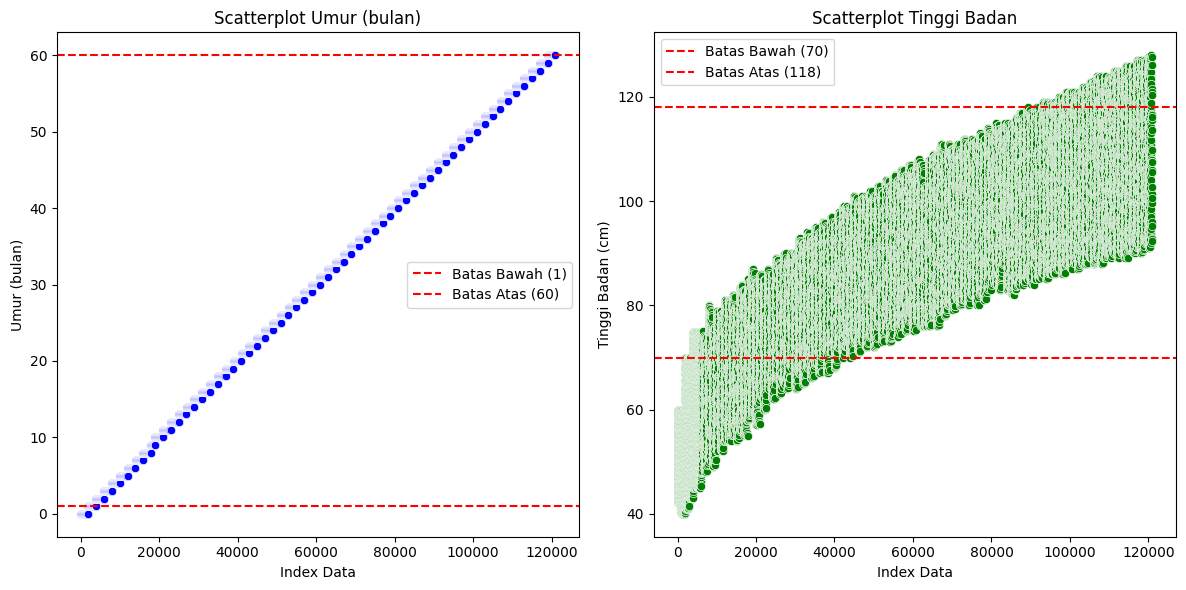

In [103]:

# 4. ANALISIS OUTLIERS
print("\nLANGKAH 4: ANALISIS OUTLIERS")

# Visualisasi outliers dengan scatterplot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data.index, y=data['Umur (bulan)'], color='blue')
plt.axhline(y=1, color='red', linestyle='--', label='Batas Bawah (1)')
plt.axhline(y=60, color='red', linestyle='--', label='Batas Atas (60)')
plt.title('Scatterplot Umur (bulan)')
plt.xlabel('Index Data')
plt.ylabel('Umur (bulan)')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=data.index, y=data['Tinggi Badan'], color='green')
plt.axhline(y=70, color='red', linestyle='--', label='Batas Bawah (70)')
plt.axhline(y=118, color='red', linestyle='--', label='Batas Atas (118)')
plt.title('Scatterplot Tinggi Badan')
plt.xlabel('Index Data')
plt.ylabel('Tinggi Badan (cm)')
plt.legend()

plt.tight_layout()
plt.savefig('outliers_before_removal.png')
print("Scatterplot outliers sebelum penghapusan tersimpan sebagai 'outliers_before_removal.png'")

# Deteksi outliers 
def detect_outliers(df, column, lower_bound, upper_bound):
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Deteksi outliers untuk setiap kolom
outliers_age = detect_outliers(data, 'Umur (bulan)', 1, 60)
outliers_height = detect_outliers(data, 'Tinggi Badan', 70, 118)

print(f"\nOutliers pada kolom Umur (bulan):")
print(f"Batas bawah: 1, Batas atas: 60")
print(f"Jumlah outliers: {len(outliers_age)}")
if len(outliers_age) > 0:
    print("Contoh outliers:")
    print(outliers_age[['Umur (bulan)']].head())

print(f"\nOutliers pada kolom Tinggi Badan:")
print(f"Batas bawah: 70, Batas atas: 118")
print(f"Jumlah outliers: {len(outliers_height)}")
if len(outliers_height) > 0:
    print("Contoh outliers:")
    print(outliers_height[['Tinggi Badan']].head())



LANGKAH 5: PENGHAPUSAN OUTLIERS
Data dengan outliers umur dihapus: 1999 record
Data dengan outliers tinggi badan dihapus: 10284 record total

RINGKASAN PENGHAPUSAN OUTLIERS:
Jumlah data awal: 39425
Jumlah data setelah penghapusan outliers: 29141
Total data yang dihapus: 10284 record
Scatterplot setelah penghapusan outliers tersimpan sebagai 'outliers_after_removal.png'


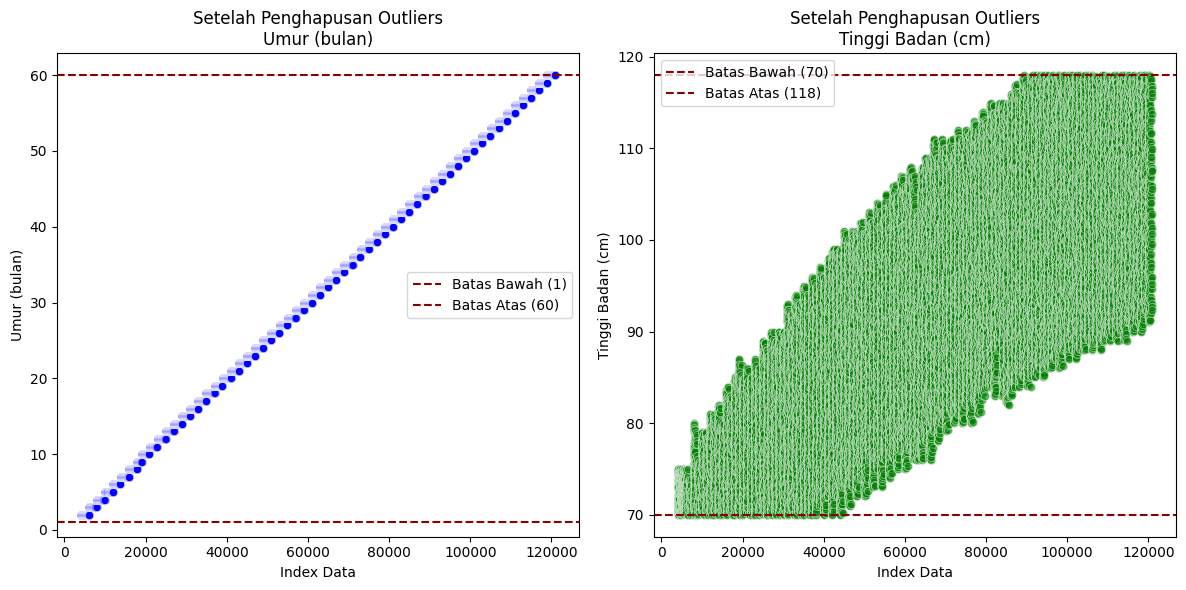

In [104]:

# 5. PENGHAPUSAN OUTLIERS
print("\nLANGKAH 5: PENGHAPUSAN OUTLIERS")

# Simpan jumlah data sebelum penghapusan
data_before_outliers = len(data)

# Hapus outliers untuk Umur (bulan)
data_clean = data[(data['Umur (bulan)'] >= 1) & (data['Umur (bulan)'] <= 60)]
print(f"Data dengan outliers umur dihapus: {data_before_outliers - len(data_clean)} record")

# Hapus outliers untuk Tinggi Badan
data_clean = data_clean[(data_clean['Tinggi Badan'] >= 70) & (data_clean['Tinggi Badan'] <= 118)]
print(f"Data dengan outliers tinggi badan dihapus: {len(data) - len(data_clean)} record total")

print(f"\nRINGKASAN PENGHAPUSAN OUTLIERS:")
print(f"Jumlah data awal: {len(data)}")
print(f"Jumlah data setelah penghapusan outliers: {len(data_clean)}")
print(f"Total data yang dihapus: {len(data) - len(data_clean)} record")

# Visualisasi setelah penghapusan outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=data_clean.index, y=data_clean['Umur (bulan)'], color='blue', alpha=0.6)
plt.axhline(y=1, color='darkred', linestyle='--', linewidth=1.5, label='Batas Bawah (1)')
plt.axhline(y=60, color='darkred', linestyle='--', linewidth=1.5, label='Batas Atas (60)')
plt.title('Setelah Penghapusan Outliers\nUmur (bulan)')
plt.xlabel('Index Data')
plt.ylabel('Umur (bulan)')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=data_clean.index, y=data_clean['Tinggi Badan'], color='green', alpha=0.6)
plt.axhline(y=70, color='darkred', linestyle='--', linewidth=1.5, label='Batas Bawah (70)')
plt.axhline(y=118, color='darkred', linestyle='--', linewidth=1.5, label='Batas Atas (118)')
plt.title('Setelah Penghapusan Outliers\nTinggi Badan (cm)')
plt.xlabel('Index Data')
plt.ylabel('Tinggi Badan (cm)')
plt.legend()

plt.tight_layout()
plt.savefig('outliers_after_removal.png', dpi=300)
print("Scatterplot setelah penghapusan outliers tersimpan sebagai 'outliers_after_removal.png'")


In [105]:

# 6. FEATURE ENGINEERING & ENCODING
print("\nLANGKAH 6: FEATURE ENGINEERING & ENCODING")

# Membuat fitur kategori umur
data_clean['Kategori Umur'] = pd.cut(data_clean['Umur (bulan)'], 
                              bins=[0, 12, 24, 36, 48, 60], 
                              labels=['0-12 bulan', '13-24 bulan', '25-36 bulan', '37-48 bulan', '49-60 bulan'])
print("Fitur baru 'Kategori Umur' berhasil dibuat.")

# Encoding kolom kategorikal
le_gender = LabelEncoder()
data_clean['Jenis Kelamin Encoded'] = le_gender.fit_transform(data_clean['Jenis Kelamin'])
print("Encoding 'Jenis Kelamin':")
for i, category in enumerate(le_gender.classes_):
    print(f"  {category} -> {i}")

le_status = LabelEncoder()
data_clean['Status Gizi Encoded'] = le_status.fit_transform(data_clean['Status Gizi'])
print("Encoding 'Status Gizi':")
for i, category in enumerate(le_status.classes_):
    print(f"  {category} -> {i}")




LANGKAH 6: FEATURE ENGINEERING & ENCODING
Fitur baru 'Kategori Umur' berhasil dibuat.
Encoding 'Jenis Kelamin':
  laki-laki -> 0
  perempuan -> 1
Encoding 'Status Gizi':
  normal -> 0
  severely stunted -> 1
  stunted -> 2
  tinggi -> 3



LANGKAH 7: ANALISIS IMBALANCE DATA

Distribusi Status Gizi Encoded:
Status Gizi Encoded
0    17519
3     4462
1     3691
2     3469
Name: count, dtype: int64
Grafik distribusi status gizi tersimpan sebagai 'status_gizi_distribution.png'

Kelas dengan sampel minimum: 2 (3469 sampel)
Kelas dengan sampel maksimum: 0 (17519 sampel)
Rasio ketidakseimbangan: 5.05
Data terdeteksi tidak seimbang (imbalanced).
Akan dilakukan penanganan dengan teknik resampling...


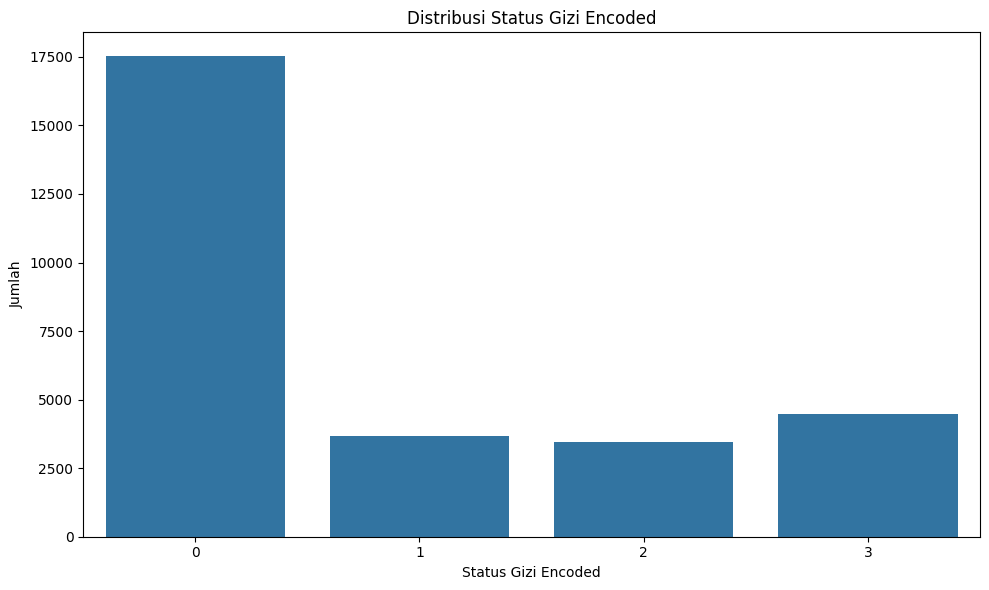

In [106]:

# 7. ANALISIS IMBALANCE DATA
print("\nLANGKAH 7: ANALISIS IMBALANCE DATA")

# Analisis distribusi status gizi
status_distribution = data_clean['Status Gizi Encoded'].value_counts()
print("\nDistribusi Status Gizi Encoded:")
print(status_distribution)

# Visualisasi distribusi status gizi
plt.figure(figsize=(10, 6))
sns.countplot(x=data_clean['Status Gizi Encoded'])
plt.title('Distribusi Status Gizi Encoded')
plt.xlabel('Status Gizi Encoded')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.savefig('status_gizi_distribution.png')
print("Grafik distribusi status gizi tersimpan sebagai 'status_gizi_distribution.png'")

# Mendeteksi ketidakseimbangan
min_samples = status_distribution.min()
max_samples = status_distribution.max()
imbalance_ratio = max_samples / min_samples

print(f"\nKelas dengan sampel minimum: {status_distribution.idxmin()} ({min_samples} sampel)")
print(f"Kelas dengan sampel maksimum: {status_distribution.idxmax()} ({max_samples} sampel)")
print(f"Rasio ketidakseimbangan: {imbalance_ratio:.2f}")

if imbalance_ratio > 1.5:
    print("Data terdeteksi tidak seimbang (imbalanced).")
    print("Akan dilakukan penanganan dengan teknik resampling...")
else:
    print("Distribusi relatif seimbang, tidak perlu penanganan khusus.")



LANGKAH 8: PENANGANAN IMBALANCE DATA

Distribusi awal status gizi:
[(0, 17519), (1, 3691), (2, 3469), (3, 4462)]

OPSI 2: SMOTE
Distribusi setelah SMOTE:
[(0, 17519), (1, 17519), (2, 17519), (3, 17519)]

Menggunakan hasil SMOTE sebagai dataset utama...


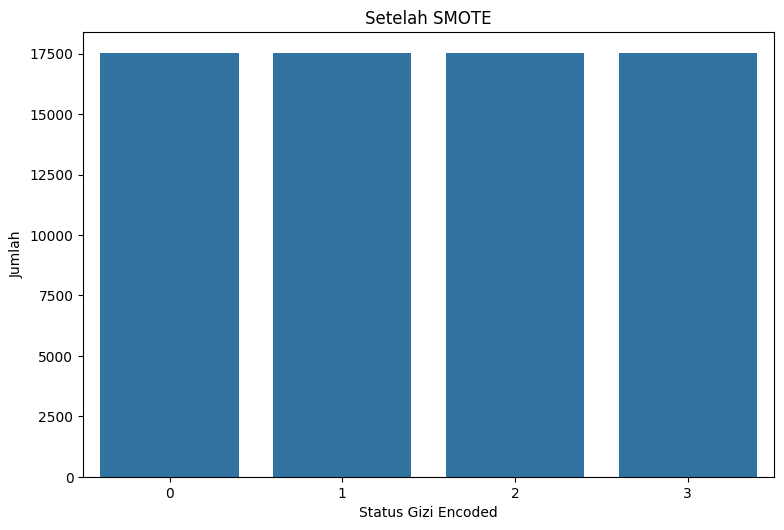

In [107]:

# 8. PENANGANAN IMBALANCE DATA
print("\nLANGKAH 8: PENANGANAN IMBALANCE DATA")

# Menyiapkan data untuk resampling
X_resample = data_clean[['Umur (bulan)', 'Tinggi Badan', 'Jenis Kelamin Encoded']]
y_resample = data_clean['Status Gizi Encoded']

print("\nDistribusi awal status gizi:")
print(sorted(Counter(y_resample).items()))



# Menggunakan SMOTE
print("\nOPSI 2: SMOTE")
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_resample, y_resample)
print("Distribusi setelah SMOTE:")
print(sorted(Counter(y_smote).items()))

# Visualisasi perbandingan
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
sns.countplot(x=y_smote)
plt.title('Setelah SMOTE')
plt.xlabel('Status Gizi Encoded')
plt.ylabel('Jumlah')


plt.tight_layout()
plt.savefig('resampling_comparison.png', dpi=300)

# Menggunakan SMOTE sebagai pilihan utama
print("\nMenggunakan hasil SMOTE sebagai dataset utama...")
data_resampled = pd.DataFrame(X_smote, columns=X_resample.columns)
data_resampled['Status Gizi Encoded'] = y_smote

# Tambahkan kembali kolom kategorikal
data_resampled['Jenis Kelamin'] = le_gender.inverse_transform(data_resampled['Jenis Kelamin Encoded'])
data_resampled['Status Gizi'] = le_status.inverse_transform(data_resampled['Status Gizi Encoded'])

# Buat ulang kategori umur
data_resampled['Kategori Umur'] = pd.cut(data_resampled['Umur (bulan)'], 
                                        bins=[0, 12, 24, 36, 48, 60], 
                                        labels=['0-12 bulan', '13-24 bulan', '25-36 bulan', '37-48 bulan', '49-60 bulan'])


In [108]:

# 9. NORMALISASI/SCALING FITUR NUMERIK
print("\nLANGKAH 9: NORMALISASI FITUR NUMERIK")

# Scaling hanya pada fitur numerik
numeric_cols = ['Umur (bulan)', 'Tinggi Badan']
scaler = StandardScaler()

# Buat salinan data untuk scaling
data_scaled = data_resampled.copy()
data_scaled[numeric_cols] = scaler.fit_transform(data_scaled[numeric_cols])

print("Hasil scaling:")
print(data_scaled[numeric_cols].describe())



LANGKAH 9: NORMALISASI FITUR NUMERIK
Hasil scaling:
       Umur (bulan)  Tinggi Badan
count  7.007600e+04  7.007600e+04
mean  -2.076590e-16  1.031806e-15
std    1.000007e+00  1.000007e+00
min   -2.048193e+00 -1.673322e+00
25%   -7.559842e-01 -8.023827e-01
50%    1.934090e-02 -6.218968e-02
75%    7.946660e-01  6.380168e-01
max    1.699212e+00  2.346398e+00


In [109]:

# 10. MENYIAPKAN DATA UNTUK PEMODELAN
print("\nLANGKAH 10: MENYIAPKAN DATA UNTUK PEMODELAN")

# Memisahkan fitur dan target
X = data_scaled[['Umur (bulan)', 'Tinggi Badan', 'Jenis Kelamin Encoded']]
y = data_scaled['Status Gizi Encoded']

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")
print(f"Jumlah fitur: {X_train.shape[1]}")



LANGKAH 10: MENYIAPKAN DATA UNTUK PEMODELAN
Jumlah data latih: 56060
Jumlah data uji: 14016
Jumlah fitur: 3


In [ ]:

# 11. MENYIMPAN HASIL PREPROCESSING
print("\nLANGKAH 11: MENYIMPAN HASIL PREPROCESSING")

# Simpan data yang sudah dipreprocessing
data_resampled.to_csv('data_balita_preprocessed.csv', index=False)
print("Data preprocessed tersimpan sebagai 'data_balita_preprocessed.csv'")

# Simpan data yang sudah di-scaled
data_scaled.to_csv('data_balita_scaled.csv', index=False)
print("Data scaled tersimpan sebagai 'data_balita_scaled.csv'")



LANGKAH 11: MENYIMPAN HASIL PREPROCESSING
Data preprocessed tersimpan sebagai 'data_balita_preprocessed.csv'
Data scaled tersimpan sebagai 'data_balita_scaled.csv'


In [111]:

# 12. RINGKASAN PREPROCESSING
print("\nLANGKAH 12: RINGKASAN PREPROCESSING")

print("="*60)
print("RINGKASAN PREPROCESSING DATA BALITA")
print("="*60)
print(f"1. Data awal: {len(data)} record")
print(f"2. Data duplikat dihapus: {duplicate_count} record")
print(f"3. Outliers dihapus: {len(data) - len(data_clean)} record")
print(f"4. Data setelah cleaning: {len(data_clean)} record")
print(f"5. Data setelah SMOTE: {len(data_resampled)} record")
print(f"6. Missing values: {missing_values.sum()}")
print(f"7. Fitur yang dibuat: Kategori Umur, Encoding kategorikal")
print(f"8. Teknik resampling: SMOTE")
print(f"9. Normalisasi: StandardScaler pada fitur numerik")
print(f"10. Data training: {len(X_train)} record")
print(f"11. Data testing: {len(X_test)} record")
print("="*60)

# Validasi final
print("\nVALIDASI FINAL:")
print("- Rentang umur (bulan):", data_resampled['Umur (bulan)'].min(), "-", data_resampled['Umur (bulan)'].max())
print("- Rentang tinggi badan:", data_resampled['Tinggi Badan'].min(), "-", data_resampled['Tinggi Badan'].max())
print("- Distribusi status gizi setelah resampling:")
print(data_resampled['Status Gizi'].value_counts())

print("\nPreprocessing data balita selesai!")
print("File yang dihasilkan:")
print("- data_balita_preprocessed.csv")
print("- data_balita_scaled.csv") 
print("- data_balita_model_ready.csv")
print("- Berbagai file visualisasi (.png)")


LANGKAH 12: RINGKASAN PREPROCESSING
RINGKASAN PREPROCESSING DATA BALITA
1. Data awal: 39425 record
2. Data duplikat dihapus: 81574 record
3. Outliers dihapus: 10284 record
4. Data setelah cleaning: 29141 record
5. Data setelah SMOTE: 70076 record
6. Missing values: 0
7. Fitur yang dibuat: Kategori Umur, Encoding kategorikal
8. Teknik resampling: SMOTE
9. Normalisasi: StandardScaler pada fitur numerik
10. Data training: 56060 record
11. Data testing: 14016 record

VALIDASI FINAL:
- Rentang umur (bulan): 2 - 60
- Rentang tinggi badan: 70.0 - 118.0
- Distribusi status gizi setelah resampling:
Status Gizi
tinggi              17519
normal              17519
stunted             17519
severely stunted    17519
Name: count, dtype: int64

Preprocessing data balita selesai!
File yang dihasilkan:
- data_balita_preprocessed.csv
- data_balita_scaled.csv
- data_balita_model_ready.csv
- Berbagai file visualisasi (.png)
